# Topic Modeling Ganxta Zolee Lyrics

In [1]:
import pandas as pd
df = pd.read_csv('./data/gxta-zl.csv')
df.head()

,album,track,lyrics
0,egyenesen-a-gettobol,egyenesen-a-gettobol,"Zolee: Egyenesen a gettóból, Csak egy kibaszot..."
1,egyenesen-a-gettobol,mr-hardcore,Zolee: Hey Mr. Hardcore itt van neked egy üzen...
2,egyenesen-a-gettobol,minden-amit-akarok-a-boom-boom,"Ez a kibaszott kurva, haver, az asztalon szere..."
3,egyenesen-a-gettobol,semmi-nem-ved-meg-featuring-szasza,Zolee: A csigidi csatornából jövök egyenesen e...
4,egyenesen-a-gettobol,figyeld-magad,"Zolee: Törött üveg mindenhol, Ez egy csavargó ..."


## Preprocess Data

In [2]:
import spacy
import hu_core_ud_lg as hu
nlp = hu.load()

In [3]:
# Drop missing rows
df = df.loc[df['lyrics'] != 'Keressük a dalszöveget!']

In [4]:
# Add extra stop words
nlp.Defaults.stop_words |= {"zolee", "big daddy", "lóry", "sámson", "dopeman", "refr"}

In [5]:
# Tokenize
import warnings
warnings.simplefilter('ignore')

df['lyrics'] = df['lyrics'].str.replace(r'[^\w\s]|\d+.+', '')
df['lyrics'] = df['lyrics'].apply(lambda text: ' '.join([word.strip() for word in text.split()]))

raw_text = df['lyrics']

tokenized_text = []
for text in raw_text:
    doc = nlp(text.lower())
    res = []
    for word in doc:
        if not word.is_stop and not word.is_punct and not word.like_num:
            res.append(word.lemma_)
    tokenized_text.append(res)

df['tokenized'] = tokenized_text
df

,album,track,lyrics,tokenized
0,egyenesen-a-gettobol,egyenesen-a-gettobol,Zolee Egyenesen a gettóból Csak egy kibaszott ...,"[egyenesen, gettó, kibaszik, g, ért, szó, mind..."
1,egyenesen-a-gettobol,mr-hardcore,Zolee Hey Mr Hardcore itt van neked egy üzenet...,"[hey, mr, hardcore, nek, üzenet, zoli, hisz, h..."
2,egyenesen-a-gettobol,minden-amit-akarok-a-boom-boom,Ez a kibaszott kurva haver az asztalon szeret ...,"[kibaszott, kurva, haver, asztal, szeret, dug,..."
3,egyenesen-a-gettobol,semmi-nem-ved-meg-featuring-szasza,Zolee A csigidi csatornából jövök egyenesen el...,"[csigidi, csatorna, jön, egyenesen, elő, figid..."
4,egyenesen-a-gettobol,figyeld-magad,Zolee Törött üveg mindenhol Ez egy csavargó a ...,"[törött, üveg, mindenhol, csavargó, sarok, bef..."
...,...,...,...,...
328,ko,muay-thai,Zolee Keleti de nem a kényelem A félelem szót ...,"[keleti, kényelem, félelem, szó, ismer, terem,..."
329,ko,haramia,Zolee Nem zavar titeket hogy ültök a trónomon ...,"[zavar, ti, ült, trónom, se, csaj, se, haver, ..."
330,ko,zuhanas,Zolee Vak kezeimmel a porban matatok És nem ta...,"[vak, kező, por, matat, talál, halálsikooly, b..."
331,ko,fura-napok,Zolee Fura napok először azt hittem belehalok ...,"[fura, nap, először, hisz, belehal, beleszarok..."


In [6]:
# Remove tokens that appear only once
all_tokens = sum(tokenized_text, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
tokenized_text_cleaned = [[word for word in text if word not in tokens_once] for text in tokenized_text]

df['tokenized_clean'] = tokenized_text_cleaned
df

,album,track,lyrics,tokenized,tokenized_clean
0,egyenesen-a-gettobol,egyenesen-a-gettobol,Zolee Egyenesen a gettóból Csak egy kibaszott ...,"[egyenesen, gettó, kibaszik, g, ért, szó, mind...","[egyenesen, gettó, kibaszik, g, ért, szó, mind..."
1,egyenesen-a-gettobol,mr-hardcore,Zolee Hey Mr Hardcore itt van neked egy üzenet...,"[hey, mr, hardcore, nek, üzenet, zoli, hisz, h...","[hey, mr, hardcore, nek, üzenet, zoli, hisz, h..."
2,egyenesen-a-gettobol,minden-amit-akarok-a-boom-boom,Ez a kibaszott kurva haver az asztalon szeret ...,"[kibaszott, kurva, haver, asztal, szeret, dug,...","[kibaszott, kurva, haver, asztal, szeret, dug,..."
3,egyenesen-a-gettobol,semmi-nem-ved-meg-featuring-szasza,Zolee A csigidi csatornából jövök egyenesen el...,"[csigidi, csatorna, jön, egyenesen, elő, figid...","[csigidi, csatorna, jön, egyenesen, elő, figid..."
4,egyenesen-a-gettobol,figyeld-magad,Zolee Törött üveg mindenhol Ez egy csavargó a ...,"[törött, üveg, mindenhol, csavargó, sarok, bef...","[üveg, mindenhol, sarok, befalcol, kurva, zaj,..."
...,...,...,...,...,...
328,ko,muay-thai,Zolee Keleti de nem a kényelem A félelem szót ...,"[keleti, kényelem, félelem, szó, ismer, terem,...","[keleti, szó, ismer, terem, harcos, stílus, mé..."
329,ko,haramia,Zolee Nem zavar titeket hogy ültök a trónomon ...,"[zavar, ti, ült, trónom, se, csaj, se, haver, ...","[zavar, ti, se, csaj, se, haver, lever, mind, ..."
330,ko,zuhanas,Zolee Vak kezeimmel a porban matatok És nem ta...,"[vak, kező, por, matat, talál, halálsikooly, b...","[vak, por, matat, talál, bitang, hal, mögött, ..."
331,ko,fura-napok,Zolee Fura napok először azt hittem belehalok ...,"[fura, nap, először, hisz, belehal, beleszarok...","[fura, nap, először, hisz, beleszarok, szar, é..."


In [7]:
# Create document-term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)

tfidf.fit(tokenized_text_cleaned)

vectors = tfidf.transform(tokenized_text_cleaned).todense()
vectors.shape

(219, 3909)

## LDA

In [8]:
# Create gensim dict and corpus
import gensim
import gensim.corpora as corpora
from gensim import models
from gensim.models import CoherenceModel
from pprint import pprint

doc_list = list(df.tokenized_clean)
dictionary = corpora.Dictionary(doc_list)

corpus = [dictionary.doc2bow(doc) for doc in doc_list]
tfidf_model = models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

In [9]:
# Build tuning pipeline to find best number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=doc_list, start=2, limit=20, step=1)

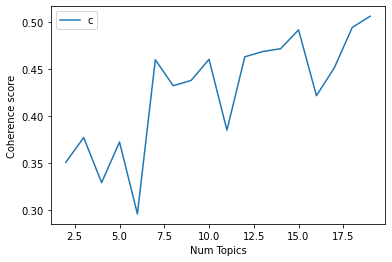

In [10]:
# Show graph
%matplotlib inline
import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3511
Num Topics = 3  has Coherence Value of 0.3775
Num Topics = 4  has Coherence Value of 0.3296
Num Topics = 5  has Coherence Value of 0.3728
Num Topics = 6  has Coherence Value of 0.2964
Num Topics = 7  has Coherence Value of 0.4601
Num Topics = 8  has Coherence Value of 0.4326
Num Topics = 9  has Coherence Value of 0.4382
Num Topics = 10  has Coherence Value of 0.4606
Num Topics = 11  has Coherence Value of 0.3854
Num Topics = 12  has Coherence Value of 0.4633
Num Topics = 13  has Coherence Value of 0.4689
Num Topics = 14  has Coherence Value of 0.4719
Num Topics = 15  has Coherence Value of 0.4919
Num Topics = 16  has Coherence Value of 0.422
Num Topics = 17  has Coherence Value of 0.4517
Num Topics = 18  has Coherence Value of 0.4945
Num Topics = 19  has Coherence Value of 0.5064


In [12]:
# Fit best model
lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=7, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model_tfidf.print_topics(num_words = 10))

[(0,
  '0.002*"zsadányi" + 0.002*"ózdi" + 0.002*"se" + 0.002*"anyag" + 0.002*"néz" '
  '+ 0.002*"világ" + 0.001*"isten" + 0.001*"ki" + 0.001*"66os" + '
  '0.001*"öcsém"'),
 (1,
  '0.003*"szerb" + 0.002*"határ" + 0.002*"tál" + 0.002*"kicsi" + 0.002*"éjfél" '
  '+ 0.001*"kié" + 0.001*"elindul" + 0.001*"kartel" + 0.001*"mikrofon" + '
  '0.001*"első"'),
 (2,
  '0.004*"boom" + 0.002*"rossz" + 0.002*"fej" + 0.002*"nyugat" + '
  '0.002*"ganxsta" + 0.002*"haver" + 0.002*"b" + 0.002*"kartel" + '
  '0.001*"divat" + 0.001*"billy"'),
 (3,
  '0.003*"oldal" + 0.002*"haver" + 0.002*"perc" + 0.002*"száll" + '
  '0.002*"nyugati" + 0.002*"tied" + 0.002*"kibaszott" + 0.002*"keleti" + '
  '0.002*"kurva" + 0.002*"emel"'),
 (4,
  '0.005*"bond" + 0.002*"blowfeld" + 0.002*"magyar" + 0.002*"enyém" + '
  '0.002*"döglégy" + 0.001*"finom" + 0.001*"elnök" + 0.001*"preziden" + '
  '0.001*"szavazat" + 0.001*"gyártmány"'),
 (5,
  '0.005*"vato" + 0.004*"gerilla" + 0.003*"loco" + 0.002*"viva" + 0.002*"kúr" '
  '+ 0.002

## Short Text Topic Modeling

In [15]:
# Input format for the model : list of strings (list of tokens)
docs = df['tokenized_clean'].tolist()
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)

print("Voc size:", n_terms)
print("Number of documents:", len(docs))

Voc size: 3909
Number of documents: 219


In [28]:
from gsdmm.gsdmm import MovieGroupProcess

# Train a new model 

# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
mgp = MovieGroupProcess(K=5, alpha=0.001, beta=0.001, n_iters=20)

vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
n_docs = len(docs)

# Fit the model on the data given the chosen seeds
y = mgp.fit(docs, n_terms)

In stage 0: transferred 169 clusters with 5 clusters populated
In stage 1: transferred 2 clusters with 4 clusters populated
In stage 2: transferred 0 clusters with 4 clusters populated
In stage 3: transferred 1 clusters with 4 clusters populated
In stage 4: transferred 0 clusters with 4 clusters populated
In stage 5: transferred 1 clusters with 4 clusters populated
In stage 6: transferred 1 clusters with 4 clusters populated
In stage 7: transferred 0 clusters with 4 clusters populated
In stage 8: transferred 1 clusters with 4 clusters populated
In stage 9: transferred 1 clusters with 4 clusters populated
In stage 10: transferred 1 clusters with 4 clusters populated
In stage 11: transferred 1 clusters with 4 clusters populated
In stage 12: transferred 0 clusters with 4 clusters populated
In stage 13: transferred 0 clusters with 4 clusters populated
In stage 14: transferred 1 clusters with 4 clusters populated
In stage 15: transferred 0 clusters with 4 clusters populated
In stage 16: tra

In [30]:
mgp.cluster_doc_count

[0, 1, 8, 2, 208]